# Git (Main): WeGo Sir-Bus-A-Lot Data Analytics Group Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1: What is the overall on-time performance, and what does the overall distribution of adherence look like?

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

print(wego.shape)
wego.head()

(350329, 30)


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [5]:
wego['ADHERENCE'].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

In [3]:
# sum adjusted counts for ontime, early, and late
ontime = wego['ADJUSTED_ONTIME_COUNT'].sum()
early = wego['ADJUSTED_EARLY_COUNT'].sum()
late = wego['ADJUSTED_LATE_COUNT'].sum()

# total trips
total = ontime + early + late

# ontime performance percentage
ontime_performance = round((ontime / total) * 100, 2)

# early performance percentage
early_performance = round((early / total) * 100, 2)

# late performance percentage
late_performance = round((late / total) * 100, 2)

print(f"Overall On-Time Performance: {ontime_performance:.2f}%")
print(f"Overall Early Performance: {early_performance:.2f}%")
print(f"Overall Late Performance: {late_performance:.2f}%")

Overall On-Time Performance: 79.69%
Overall Early Performance: 2.88%
Overall Late Performance: 17.42%


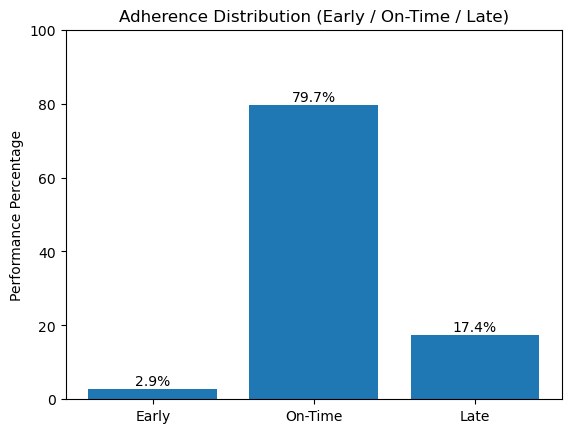

In [4]:
# plot adherence distribution
pct = {
    "Early": early_performance,
    "On-Time": ontime_performance,
    "Late": late_performance
}

labels, values = zip(*pct.items())

plt.figure()
plt.bar(labels, values)
plt.ylabel("Performance Percentage")
plt.title("Adherence Distribution (Early / On-Time / Late)")
plt.ylim(0, 100)
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center")

# plt.savefig('adherence_distribution.png')

plt.show()

In [6]:
# find mean of adherence for route
adherence_route_mean = wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean().reset_index()
adherence_route_mean = pd.DataFrame(adherence_route_mean)
adherence_route_mean

,ROUTE_ABBR,ADHERENCE
0,3,-3.761491
1,7,-3.346555
2,22,-1.138107
3,23,-1.760110
4,50,-2.505022
5,52,-3.971342
6,55,-4.823302
7,56,-2.703988


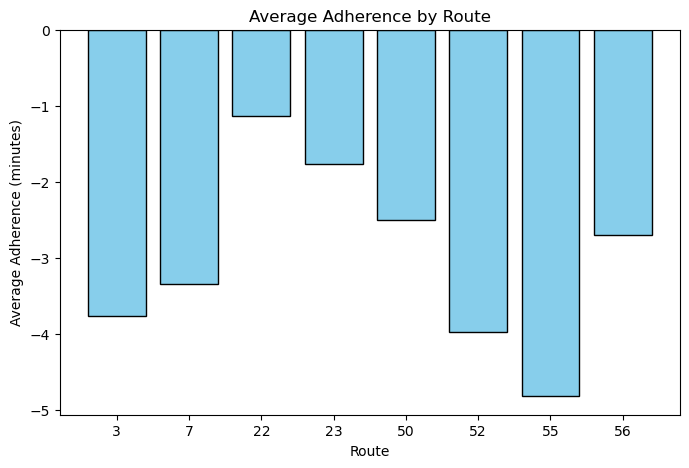

In [7]:
# plot average adherence by route
plt.figure(figsize=(8,5))
plt.bar(adherence_route_mean['ROUTE_ABBR'].astype(str), adherence_route_mean['ADHERENCE'] , color='skyblue', edgecolor='black')
plt.title('Average Adherence by Route')
plt.xlabel('Route')
plt.ylabel('Average Adherence (minutes)')
plt.show()